## Question 1 : Linear Regression
To check whether you are able to build simple linear regression model from scratch or not.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/X.npy -O X.npy
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/y.npy -O y.npy

--2021-05-27 15:35:14--  https://github.com/adigup390/datasets/raw/main/X.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/adigup390/datasets/main/X.npy [following]
--2021-05-27 15:35:14--  https://raw.githubusercontent.com/adigup390/datasets/main/X.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 528 [application/octet-stream]
Saving to: ‘X.npy’

X.npy               100%[===================>]     528  --.-KB/s    in 0s      

2021-05-27 15:35:14 (22.5 MB/s) - ‘X.npy’ saved [528/528]

--2021-05-27 15:35:14--  https://github.com/adigup390/datasets/raw/main/y.npy
Resolving github.com (github

In [2]:
def load_data_LR():
  # Implement this function to read the dataset using the path declared in path_X and path_y
  # should return the X and y data
  # use np.load() to load the data google it you will get to know how to do it

  path_X = "X.npy"
  path_y = "y.npy"

  # Write your code here ----------
  
  X=np.load(path_X)

  y=np.load(path_y)

  # -------------------------------

  return X, y

In [3]:
def get_linear_model(X, y):
  # This shoudl return a proper linear model without bias of type y = XW

  # Write your code here ----------
  
  # --------------------

  shape_y=y.shape[1]
  shape_x=X.shape[1]
  
  W = np.random.randn(shape_x, shape_y)

  return W

In [4]:
def MSE(y, y_pred):
  # should return the mean square error between the actual y and predicted y

  # Write your code here ----------
  error = np.sum((y-y_pred)**2)
  
  # -------------------------------

  return error

In [5]:
def train_by_algebra(X, y):
  # should return the trained weight 'W' using the linear algebra method i.e. setting dE/dW = 0

  # Write your code here ----------
  xtx=np.linalg.inv(np.matmul(X.T,X))
  
  W=np.matmul(np.matmul(xtx,X.T),y)
  # -------------------------------

  return W

In [6]:
def train_by_GD(X, y, epochs=5, lr=0.01):
  # should return the trained weight 'W' using the gradient descent for number of iterations equals to epochs
  # should also return error history int the cariable error_hist.shape = (epochs,); error_hist[i] = mean square error after epoch i-1
  # should also print mean square error after each epoch/ iteration
  # lr = "learning rate" i.e. eta
  
  # Write your code here ----------
  error_hist=np.zeros(epochs,)

  W=get_linear_model(X,y)

  for i in range(epochs):
    W=W-lr*np.matmul((np.matmul(X,W)-y).T,X)#updating W
    y_pred=np.matmul(X,W)

    error_hist[i]=MSE(y,y_pred)/len(y)
    print(error_hist[i])

  # -------------------------------

  return W, error_hist

### Now write a complete code using the function defined above to learn the model for following cases:

##### Learn **W** using linear algebra method and prints mean square error between actual y and predicted y. Use `y_pred = XW`. Also plot y_pred and y on different plots.

5.490059820643823


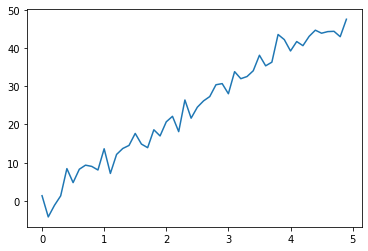

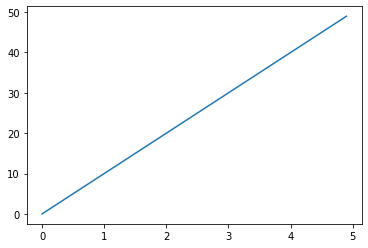

In [7]:
# Write your code here ----------
  
import matplotlib.pyplot as plt

X,y=load_data_LR()
W=train_by_algebra(X,y)
y_pred=np.matmul(X,W)

print(MSE(y,y_pred)/X.shape[0])

plt.plot(X,y)
plt.show()
plt.plot(X,y_pred)
plt.show()
# -------------------------------

##### Learn **W** using gradient descent method for following learning rates, `lr = [0.01, 0.001, 0.0001]` for **10 epochs**. Plot **MSE vs epochs** for each of them.  Also plot y_pred and y on different plots.

6349.203649842682
58728.0176681466
543588.55064037
5031848.562635981
46578801.89330203
431170899.15306985
3991265428.767898
36946370721.097275
342005395360.54004
3165877681261.84


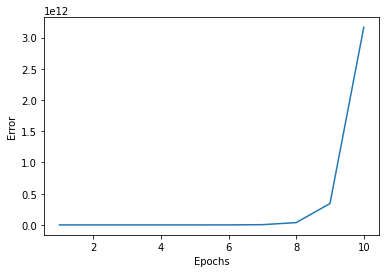

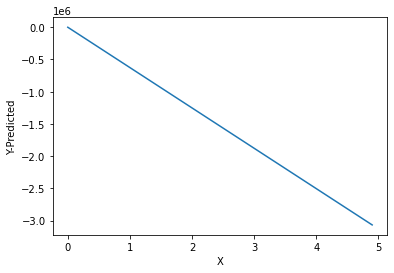

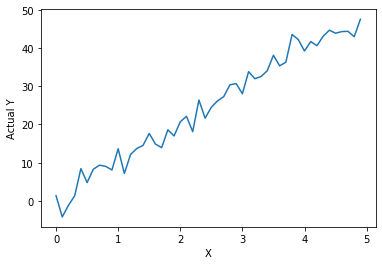

357.0063521631207
130.24954123601924
49.769453243093636
21.205616342814963
11.067794692602046
7.469698674537925
6.1926694071176405
5.739428653769032
5.578565323744507
5.521472022324903


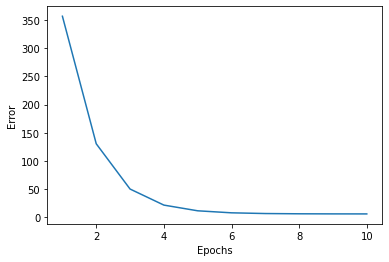

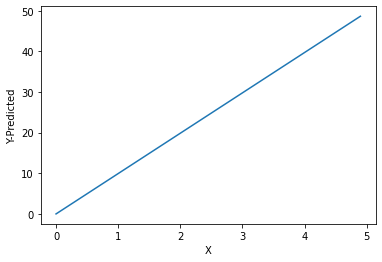

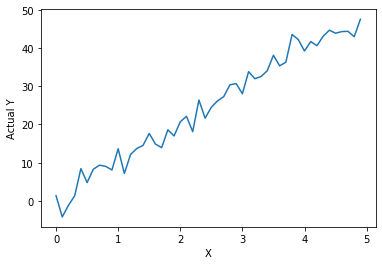

766.1458888837738
705.889914122168
650.407165773542
599.3195287965295
552.2788408425837
508.96451952887327
469.08137766870044
432.3576115702305
398.5429486937869
367.40694204399


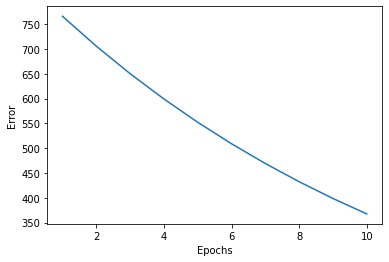

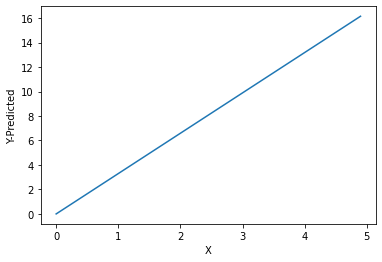

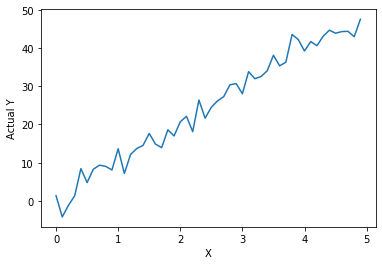

In [24]:
# Write your code here ----------
lr=[0.01, 0.001,0.0001]
epoch=[i+1 for i in range(10)]

for i in lr:
  X,y=load_data_LR()
  W,error=train_by_GD(X,y,10,i)
  plt.plot(epoch,error)
  plt.ylabel('Error')
  plt.xlabel('Epochs')
  plt.show()
  y_pred=np.matmul(X,W)
  plt.plot(X,y_pred)
  plt.ylabel('Y-Predicted')
  plt.xlabel('X')
  plt.show()
  plt.plot(X,y)
  plt.xlabel('X')
  plt.ylabel('Actual Y')
  plt.show()
# -------------------------------

## Question 2: Image Classification in Tensorflow using Deep Learning
To check whether you are able to build a given neural network model in tensorflow or not. First we will build a fully connected NN model second we will build a CNN model.

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras

In [17]:
def plot_history(history):
  # function to plot accuracy vs epoch

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

In [18]:
def load_data_cifar10_norm():
  # should return the normalised cifar10 dataset by loading it from tensorflow
  # link: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/

 

  # Write your code here ----------
  cifar_dataset=tf.keras.datasets.cifar10

  (x_train, y_train), (x_test, y_test)=cifar_dataset.load_data()
  x_train=x_train/255.0
  x_test=x_test/255.0

  # -----------------------

  return x_train, y_train, x_test, y_test

### Define a fully connected neural network model with following attributes:

*   Total number of **hidden layers = 4**, all with **relu** activation
*   Number of neurons in **first hidden layer = 7200**
*   Number of neurons in **second hidden layer = 2304**
*   Number of neurons in **third hidden layer = 1024**
*   Number of neurons in **fourth hidden layer = 64**


In [19]:
def build_fc_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------
  model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(7200,activation='relu'),
                                    tf.keras.layers.Dense(2304,activation='relu'),
                                    tf.keras.layers.Dense(1024,activation='relu'),
                                    tf.keras.layers.Dense(64,activation='relu'),
                                    tf.keras.layers.Dense(num_class,activation='softmax')
                                    ])
  # -------------------------------

  return model

### Define a CNN model with following attribute:

*   Total number of **hidden layer = 4**
*   After every convolutional layer there must be a MaxPoolingLayer of size (2, 2)
*   Total number of convolutional layer = 3, all with **relu** activation.
    *    Number of filters in **first convolutional layer = 32**
    *    Number of filters in **second convolutional layer = 64**
    *    Number of filters in **third convolutional layer = 64**
*   After all convolutional layer flatten the output and use **dense layer of 64 neurons**



In [20]:
def build_cnn_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------
  model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(64,activation='relu'),
                                    tf.keras.layers.Dense(num_class,activation='softmax')
                                    ])
  # -------------------------------

  return model

### Compile and train the fully connected neural network model using the above functions.

Epoch 1/10
98/98 [==============================] - 226s 2s/step - loss: 4.8017 - accuracy: 0.1344 - val_loss: 2.5402 - val_accuracy: 0.0999
Epoch 2/10
98/98 [==============================] - 232s 2s/step - loss: 2.2461 - accuracy: 0.1505 - val_loss: 2.2868 - val_accuracy: 0.1284
Epoch 3/10
98/98 [==============================] - 226s 2s/step - loss: 2.1479 - accuracy: 0.1820 - val_loss: 2.0704 - val_accuracy: 0.2225
Epoch 4/10
98/98 [==============================] - 227s 2s/step - loss: 2.0348 - accuracy: 0.2460 - val_loss: 2.0192 - val_accuracy: 0.2568
Epoch 5/10
98/98 [==============================] - 227s 2s/step - loss: 1.9491 - accuracy: 0.2911 - val_loss: 1.8642 - val_accuracy: 0.3205
Epoch 6/10
98/98 [==============================] - 228s 2s/step - loss: 1.8875 - accuracy: 0.3179 - val_loss: 1.8874 - val_accuracy: 0.3225
Epoch 7/10
98/98 [==============================] - 233s 2s/step - loss: 1.8374 - accuracy: 0.3369 - val_loss: 1.7514 - val_accuracy: 0.3671
Epoch 8/10
98

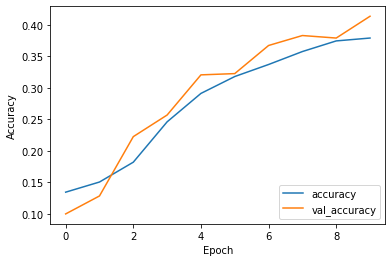

In [21]:
# Write your code here ----------
x_train, y_train, x_test, y_test=load_data_cifar10_norm()

model=build_fc_model()

model.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

x_train, y_train, x_test, y_test=load_data_cifar10_norm()
# -------------------------------

history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
model.summary()

### Compile and train the CNN model using the above functions.

Epoch 1/10
98/98 [==============================] - 59s 594ms/step - loss: 2.1062 - accuracy: 0.2246 - val_loss: 1.8440 - val_accuracy: 0.3279
Epoch 2/10
98/98 [==============================] - 58s 591ms/step - loss: 1.8605 - accuracy: 0.3235 - val_loss: 2.0020 - val_accuracy: 0.3082
Epoch 3/10
98/98 [==============================] - 58s 589ms/step - loss: 1.7308 - accuracy: 0.3703 - val_loss: 1.7134 - val_accuracy: 0.3969
Epoch 4/10
98/98 [==============================] - 58s 589ms/step - loss: 1.6336 - accuracy: 0.4097 - val_loss: 1.6356 - val_accuracy: 0.4204
Epoch 5/10
98/98 [==============================] - 58s 591ms/step - loss: 1.5576 - accuracy: 0.4376 - val_loss: 1.4732 - val_accuracy: 0.4657
Epoch 6/10
98/98 [==============================] - 57s 587ms/step - loss: 1.4910 - accuracy: 0.4648 - val_loss: 1.3616 - val_accuracy: 0.5229
Epoch 7/10
98/98 [==============================] - 57s 582ms/step - loss: 1.4400 - accuracy: 0.4819 - val_loss: 1.4910 - val_accuracy: 0.4829

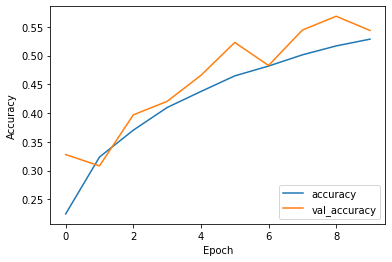

In [22]:
# Write your code here ----------
model=build_cnn_model()
model.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
x_train, y_train, x_test, y_test=load_data_cifar10_norm()
# -------------------------------

history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
model.summary()

### What do you observe? Compare both the model by looking at their Accuracy vs Epoch plot and total numbers of trainable parameters.

In [23]:
print(" time consumed is larger in fc model bcoz i fc model trainable parameters are large on other hand in cnn model trainable parameters are less hence consume lesser time.in cnn model accuracy also better than fc model  ")

 time consumed is larger in fc model bcoz i fc model trainable parameters are large on other hand in cnn model trainable parameters are less hence consume lesser time.in cnn model accuracy also better than fc model  
